In [1]:
import glob
import os
import cv2
import glob
import importlib

import _pickle as pkl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import analyze2p.utils as hutils
import analyze2p.plotting as pplot

import analyze2p.receptive_fields.utils as rfutils
import analyze2p.aggregate_datasets as aggr
import analyze2p.extraction.traces as traceutils
import pylab as pl


In [3]:
import h5py
import json
import analyze2p.extraction.rois as roiutils
import analyze2p.retinotopy.utils as retutils
import analyze2p.retinotopy.segment as seg

import analyze2p.gradients as grd

In [4]:
visual_areas=['V1', 'Lm', 'Li']
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
meta = sdata[sdata.experiment.isin(['rfs', 'rfs10'])].copy()

/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 3 dsets


In [5]:
meta[(meta.visual_area=='Li') & (meta.experiment=='rfs')]

,experiment,visual_area,datakey,fov,animalid,session,fovnum
22,rfs,Li,20190522_JC089_fov1,FOV1_zoom2p0x,JC089,20190522,1
31,rfs,Li,20190602_JC091_fov1,FOV1_zoom2p0x,JC091,20190602,1
64,rfs,Li,20191017_JC113_fov1,FOV1_zoom2p0x,JC113,20191017,1


## Load NP receptive field fits

In [6]:
rootdir = '/n/coxfs01/2p-data'

# datakey = '20191006_JC110_fov1'
#dk = '20190522_JC084_fov1'
experiment='rfs'
traceid='traces001'

response_type='dff'
is_neuropil=True
do_spherical_correction=False

fit_thr=0.5

In [7]:
experiment='rfs'
va = 'V1'
meta['session_int'] = meta['session'].astype(int)

dsets = meta[(meta.experiment==experiment) & (meta.visual_area.isin(['V1', 'Lm']))
            & (meta['session_int']>=20190511)].copy()
dsets

,experiment,visual_area,datakey,fov,animalid,session,fovnum,session_int
111,rfs,Lm,20190512_JC083_fov1,FOV1_zoom2p0x,JC083,20190512,1,20190512
115,rfs,Lm,20190513_JC078_fov1,FOV1_zoom2p0x,JC078,20190513,1,20190513
119,rfs,Lm,20190517_JC083_fov1,FOV1_zoom2p0x,JC083,20190517,1,20190517
123,rfs,Lm,20190525_JC084_fov1,FOV1_zoom2p0x,JC084,20190525,1,20190525
129,rfs,Lm,20190603_JC080_fov1,FOV1_zoom2p0x,JC080,20190603,1,20190603
133,rfs,Lm,20190618_JC097_fov1,FOV1_zoom2p0x,JC097,20190618,1,20190618
138,rfs,Lm,20190627_JC091_fov1,FOV1_zoom2p0x,JC091,20190627,1,20190627
175,rfs,V1,20190511_JC083_fov1,FOV1_zoom2p0x,JC083,20190511,1,20190511
179,rfs,V1,20190512_JC083_fov1,FOV1_zoom2p0x,JC083,20190512,1,20190512
183,rfs,V1,20190517_JC083_fov1,FOV1_zoom2p0x,JC083,20190517,1,20190517


In [8]:
dk_list = dsets['datakey'].unique() #@[0::3]
print(dk_list)

['20190512_JC083_fov1' '20190513_JC078_fov1' '20190517_JC083_fov1'
 '20190525_JC084_fov1' '20190603_JC080_fov1' '20190618_JC097_fov1'
 '20190627_JC091_fov1' '20190511_JC083_fov1' '20190522_JC084_fov1'
 '20190613_JC097_fov1' '20190616_JC097_fov1' '20190617_JC097_fov1'
 '20190622_JC085_fov1' '20191006_JC110_fov1']


In [9]:
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
basedir = os.path.join(aggregate_dir, 'receptive-fields', 'neuropil')

target_sigma_um=40
desired_radius_um=20
smooth_spline_x=1
smooth_spline_y=1
create_new=False
redo_smooth=True
is_neuropil=True
ds_factor=1

In [123]:
# MAPS = grd.cycle_and_load_maps(dk_list)
# MAPS = dict() #dict((k, ) for k in dk_list)
# for dk in dk_list:
#     res = grd.get_background_maps(dk, experiment=experiment, traceid=traceid,
#                             response_type=response_type, is_neuropil=is_neuropil,  
#                             do_spherical_correction=do_spherical_correction,    
#                             create_new=False, redo_smooth=False, 
#                             target_sigma_um=target_sigma_um, 
#                             smooth_spline_x=smooth_spline_x, 
#                             smooth_spline_y=smooth_spline_y, ds_factor=ds_factor)
#     MAPS[dk] = res

In [ ]:
# plot

In [82]:
# %matplotlib notebook

<IPython.core.display.Javascript object>


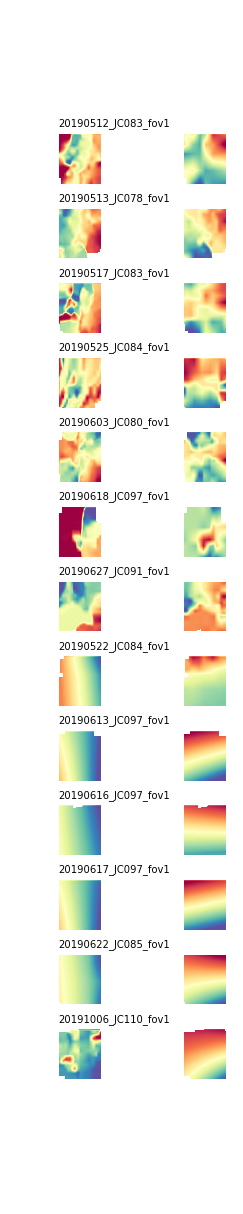

In [112]:
# fig, axn = pl.subplots(len(MAPS.keys()), 2, figsize=(3,15))

# for ai, dk in enumerate(MAPS.keys()):
#     ax=axn[ai, 0]
#     ax.imshow(MAPS[dk]['azim_final'], cmap='Spectral')
#     ax.set_title(dk, loc='left', fontsize=8)
    
#     ax=axn[ai, 1]
#     ax.imshow(MAPS[dk]['elev_final'], cmap='Spectral')

# for ax in axn.flat:
#     ax.axis('off')
# pl.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.9, 
#                    hspace=0.5, wspace=0.2)

# pl.savefig(os.path.join(basedir, 'np_maps.png'))


In [27]:
MAPS[dk].keys()

dict_keys(['azim_orig', 'azim_final', 'elev_orig', 'elev_final', 'fitdf'])

## Calculate gradient from TILES map

In [10]:
importlib.reload(grd)

<module 'analyze2p.gradients' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gradients.py'>

In [13]:
# Select datas
dk = '20190617_JC097_fov1'
# dk = '20190522_JC084_fov1'
# dk = '20191006_JC110_fov1'
# ---------------------------------------------------------
# az_map = MAPS[dk]['azim_final'].copy()
# el_map = MAPS[dk]['elev_final'].copy()
# fitdf = MAPS[dk]['fitdf'].copy()

res = grd.get_background_maps(dk, experiment=experiment, traceid=traceid,
                        response_type=response_type, is_neuropil=is_neuropil,  
                        do_spherical_correction=do_spherical_correction,    
                        create_new=False, redo_smooth=False, 
                        target_sigma_um=target_sigma_um, 
                        smooth_spline_x=smooth_spline_x, 
                        smooth_spline_y=smooth_spline_y, ds_factor=ds_factor)
az_map = res['azim_final'].copy()
el_map = res['elev_final'].copy()
fitdf_np = res['fitdf'].copy()

In [14]:
# Load SOMA fits
# ** is_neuropil=False
fit_results, fit_params = rfutils.load_fit_results(dk, experiment=experiment,
                        traceid=traceid, response_type=response_type,
                        is_neuropil=False,
                        do_spherical_correction=do_spherical_correction)
fitdf_all = rfutils.rfits_to_df(fit_results, fit_params, 
                                convert_coords=True, scale_sigma=True)
fitdf_soma = fitdf_all[fitdf_all['r2']>fit_thr].copy()
# Add position info
fitdf_soma['cell'] = fitdf_soma.index.tolist()
fitdf_soma = hutils.add_meta_to_df(fitdf_soma, {'datakey': dk, 'visual_area': va,
                                                'experiment': experiment})
fitdf_soma = aggr.add_roi_positions(fitdf_soma)

Adding ROI position info...


In [16]:
curr_grd_dir = os.path.join(fit_params['rfdir'], 'neuropil')
print(curr_grd_dir)

/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/combined_rfs_static/traces/traces001_f924db_traces001_85f376_traces001_db2b5e_traces001_acfba1_traces001_c58358_traces001_205616/receptive_fields/fit-2dgaus_dff-no-cutoff/neuropil


In [17]:
# Calculate gradient from TILES
grad_az = seg.image_gradient(az_map)
grad_el = seg.image_gradient(el_map)

In [18]:
# importlib.reload(grd)

<IPython.core.display.Javascript object>


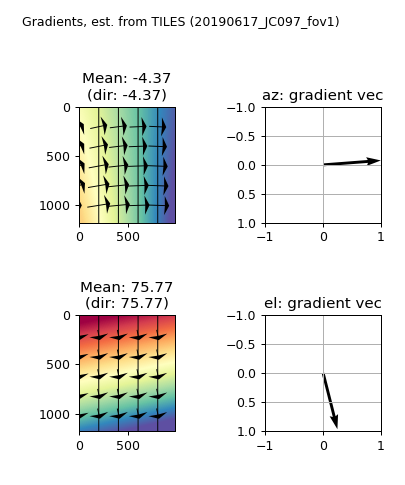

/n/coxfs01/2p-data/JC097/20190617/FOV1_zoom2p0x/combined_rfs_static/traces/traces001_f924db_traces001_85f376_traces001_db2b5e_traces001_acfba1_traces001_c58358_traces001_205616/receptive_fields/fit-2dgaus_dff-no-cutoff/neuropil


In [20]:
%matplotlib notebook
# Check gradient
spacing =200
scale = 0.0001 #0.0001
width = 0.01 #1 #0.01
headwidth=20

fig = grd.plot_gradients(az_map, el_map, grad_az, grad_el,
                  spacing=spacing, scale=scale, width=width, headwidth=headwidth)

pl.subplots_adjust(left=0.1, right=0.9, bottom=0.2, hspace=0.8, top=0.8)
fig.text(0.05, 0.95, 'Gradients, est. from TILES (%s)' % dk)

pl.savefig(os.path.join(curr_grd_dir, 'np_gradients.svg'))
print(curr_grd_dir)

In [22]:
gvectors_TILES

NameError: name 'gvectors_TILES' is not defined

In [469]:
img = az_map.copy()
d1, d2 = img.shape
x, y = np.meshgrid(np.arange(0, d2), np.arange(0, d1))
# y - cols, x - rows

# u1 = gvectors_TILES['az']
u2 = np.array([0.9, 0.5])# #gvectors_TILES['az']
u1 = np.array([0.9, 0.5])

o1 = np.array([1, 0]) + np.finfo(np.float32).eps
o2 = np.array([0, 1]) + np.finfo(np.float32).eps

x, y = np.meshgrid(np.arange(0, d2), np.arange(0, d1))
df = pd.DataFrame({'x': x.ravel(), 'y': y.ravel()})

T1 = roiutils.get_transformation_matrix(o1, u1)     
transf_x = [T1.dot(np.array([x, y])) for (x,y)\
            in df[['x', 'y']].values]    
      
T2 = roiutils.get_transformation_matrix(u2, o1)
transf_y = [T2.dot(np.array([y, x])) for (x,y) \
            in df[['x', 'y']].values]

<IPython.core.display.Javascript object>


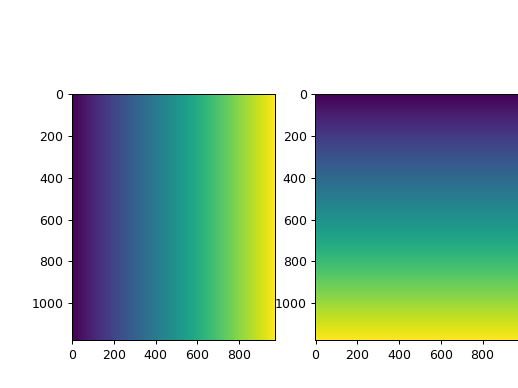

In [470]:
fig, axn = pl.subplots(1,2)
axn[0].imshow(x)
axn[1].imshow(y)

In [488]:
importlib.reload(grd)

<module 'analyze2p.gradients' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gradients.py'>

In [708]:
B_2 = np.array([[0.9, 0.],
              [0.45, 0.99]])
B_2


u1 = np.array([1, 0])# #gvectors_TILES['az']
u2 = np.array([0.9, 0.45])
B_2 = grd.change_of_basis(u1, u2)
B_2

array([[1.  , 0.9 ],
       [0.  , 0.45]])

In [513]:
# v_B1 = np.array([1, 0])
# v_B2 = np.linalg.inv(B_2) @ v_B1
# v_B2

In [911]:
# u1 = np.array([1, -0.08])# #gvectors_TILES['az']
# u2 = np.array([.3, 0.95])
# B_2 = grd.change_of_basis(u1, u2)
# B_2
u1 = np.array([1, 0])# #gvectors_TILES['az']
u2 = np.array([0.2, 0.7])
B_2 = grd.change_of_basis(u1, u2)
B_2

array([[1. , 0.2],
       [0. , 0.7]])

In [912]:
xx, yy = np.meshgrid(np.arange(0, d2), np.arange(0, d1))
xx.shape

(200, 100)

150 100


<IPython.core.display.Javascript object>


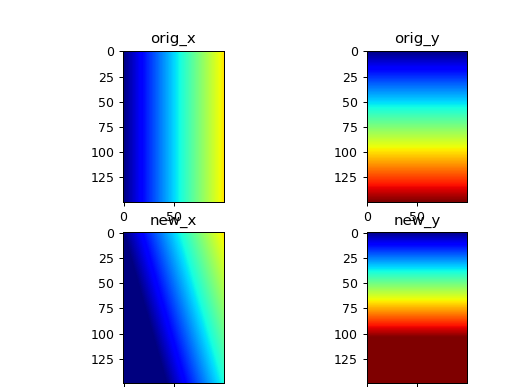

Text(0.5, 1.0, 'new_y')

In [918]:
newx0 = newx.copy()
d1, d2 = (150, 100) #az_map.shape*0.5
print(d1, d2)
o1 = np.array([1, 0]) + np.finfo(np.float32).eps
o2 = np.array([0, 1]) + np.finfo(np.float32).eps
# df=pd.DataFrame({'az': az_map.ravel(), 'el': el_map.ravel()})
xx, yy = np.meshgrid(np.arange(0, d2), np.arange(0, d1))
df = pd.DataFrame({'x': xx.ravel(), 'y': yy.ravel()})
origx = np.reshape(df['x'].values, (d1, d2))
origy = np.reshape(df['y'].values, (d1, d2))
# ----------------------------------
T1 = roiutils.get_transformation_matrix(o1, u2)
transf_vs = [T1.dot(np.array([x, y])) for (x,y) \
             in df[['x', 'y']].values]
# transf_vs = [np.linalg.inv(B_2) @ np.array((x, y)) \
#             for (x, y) in df[['x', 'y']].values]
# ------------------------------------
# plot
proj_ctx_x = np.array([p[0] for p in transf_vs])
proj_ctx_y = np.array([p[1] for p in transf_vs])
newx = np.reshape(proj_ctx_x, (d1, d2))
newy = np.reshape(proj_ctx_y, (d1, d2))

fig, axn = pl.subplots(2,2)
ax=axn[0,0]
ax.imshow(origx, cmap='jet', vmin=origy.min(), vmax=origy.max())
ax.set_title('orig_x')
ax=axn[0,1]
ax.imshow(origy, cmap='jet', vmin=origy.min(), vmax=origy.max())
ax.set_title('orig_y')
ax=axn[1,0]
ax.imshow(newx, cmap='jet', vmin=origy.min(), vmax=origy.max())
ax.set_title('new_x')
ax=axn[1,1]
ax.imshow(newy, cmap='jet', vmin=origy.min(), vmax=origy.max())
ax.set_title('new_y')

<IPython.core.display.Javascript object>


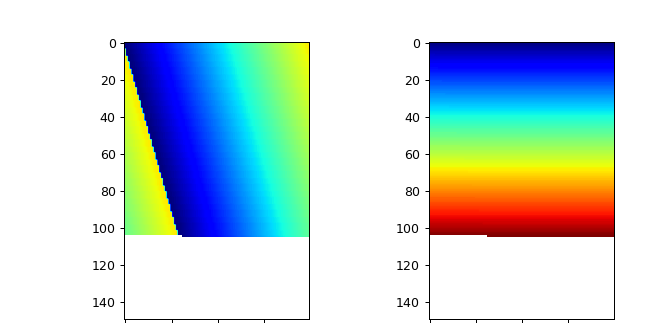

In [920]:
test1 = np.array([xx[int(i), int(j)] if (int(i)<=xx.shape[0]-1 and int(j)<=xx.shape[1]-1) \
                  else np.nan
                   for (i, j) in zip(proj_ctx_y, proj_ctx_x)])
timgx = np.reshape(test1, (d1, d2))
test2 = np.array([yy[int(i), int(j)] if (int(i)<=yy.shape[0]-1 and int(j)<=yy.shape[1]-1) \
                  else np.nan
                   for (i, j) in zip(proj_ctx_y, proj_ctx_x)])
timgy = np.reshape(test2, (d1, d2))

fig, axn = pl.subplots(1,2, figsize=(8,4))
axn[0].imshow(timgx, cmap='jet', vmin=origy.min(), vmax=origy.max())
axn[1].imshow(timgy, cmap='jet', vmin=origy.min(), vmax=origy.max())

In [897]:
proj_ctx_x.max(), proj_ctx_y.max()


(98.99998819828174, 398.0)

In [865]:
np.where(newx.round(2)!=newx0.round(2))


(array([  1,   1,   1, ..., 199, 199, 199]),
 array([ 0,  1,  2, ..., 97, 98, 99]))

In [870]:
newdf = pd.DataFrame(transf_vs, columns=['x_p', 'y_p'])

<IPython.core.display.Javascript object>


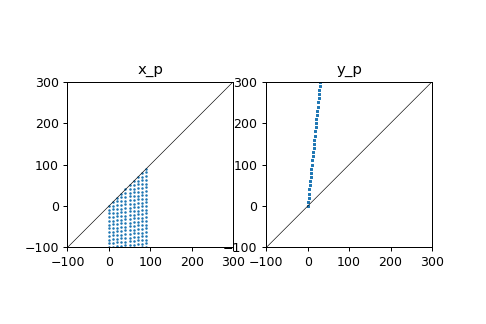

In [872]:
vmin=-100
vmax=300
fig, axn = pl.subplots(1,2, figsize=(6,4))
ax=axn[0]; ax.set_title('x_p');
ax.scatter(df['x'][0::10], newdf['x_p'][0::10], s=1)
ax=axn[1]; ax.set_title('y_p');
ax.scatter(df['y'][0::10], newdf['y_p'][0::10], s=1)
pl.subplots_adjust(bottom=0.2, right=0.8)
for ax in axn:
    ax.set_aspect('equal')
    ax.set_xlim([vmin, vmax])
    ax.set_ylim([vmin, vmax])
    ax.plot([vmin, vmax], [vmin, vmax], 'k', lw=0.5)

In [823]:
for x, y in zip(df['x'][0::10], newdf['x_p'][0::10]):
    print(x, y)

0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80

60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40 40.0
50 50.0
60 60.0
70 70.0
80 80.0
90 90.0
0 0.0
10 10.0
20 20.0
30 30.0
40

In [824]:
for x, y in zip(df['y'][0::10], newdf['y_p'][0::10]):
    print(x, y)

0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.4285714285714286
1 1.4285714285714286
1 1.4285714285714286
1 1.4285714285714286
1 1.4285714285714286
1 1.4285714285714286
1 1.4285714285714286
1 1.4285714285714286
1 1.4285714285714286
1 1.4285714285714286
2 2.857142857142857
2 2.857142857142857
2 2.857142857142857
2 2.857142857142857
2 2.857142857142857
2 2.857142857142857
2 2.857142857142857
2 2.857142857142857
2 2.857142857142857
2 2.857142857142857
3 4.285714285714286
3 4.285714285714286
3 4.285714285714286
3 4.285714285714286
3 4.285714285714286
3 4.285714285714286
3 4.285714285714286
3 4.285714285714286
3 4.285714285714286
3 4.285714285714286
4 5.714285714285714
4 5.714285714285714
4 5.714285714285714
4 5.714285714285714
4 5.714285714285714
4 5.714285714285714
4 5.714285714285714
4 5.714285714285714
4 5.714285714285714
4 5.714285714285714
5 7.142857142857143
5 7.142857142857143
5 7.142857142857143
5 7.142857142857143
5 7.142857142857143
5 7.142857142857143
5 7.142857

193 275.7142857142857
193 275.7142857142857
193 275.7142857142857
193 275.7142857142857
193 275.7142857142857
193 275.7142857142857
193 275.7142857142857
193 275.7142857142857
194 277.14285714285717
194 277.14285714285717
194 277.14285714285717
194 277.14285714285717
194 277.14285714285717
194 277.14285714285717
194 277.14285714285717
194 277.14285714285717
194 277.14285714285717
194 277.14285714285717
195 278.57142857142856
195 278.57142857142856
195 278.57142857142856
195 278.57142857142856
195 278.57142857142856
195 278.57142857142856
195 278.57142857142856
195 278.57142857142856
195 278.57142857142856
195 278.57142857142856
196 280.0
196 280.0
196 280.0
196 280.0
196 280.0
196 280.0
196 280.0
196 280.0
196 280.0
196 280.0
197 281.42857142857144
197 281.42857142857144
197 281.42857142857144
197 281.42857142857144
197 281.42857142857144
197 281.42857142857144
197 281.42857142857144
197 281.42857142857144
197 281.42857142857144
197 281.42857142857144
198 282.8571428571429
198 282.8571

In [706]:
u1 = np.array([1, 0])# #gvectors_TILES['az']
u2 = np.array([-1, 0.5])

B_2 = grd.change_of_basis(u1, u2)
B_2

array([[ 1. , -1. ],
       [ 0. ,  0.5]])

In [707]:
print(np.linalg.inv(B_2) @ np.array([1, 0]))

print(np.linalg.inv(B_2) @ np.array([0, 1]))


[1. 0.]
[2. 2.]


In [719]:
d1, d2 = (600, 400) #az_map.shape*0.5
print(d1, d2)
o1 = np.array([1, 0]) + np.finfo(np.float32).eps
o2 = np.array([0, 1]) + np.finfo(np.float32).eps
# df=pd.DataFrame({'az': az_map.ravel(), 'el': el_map.ravel()})
x, y = np.meshgrid(np.arange(0, d2), np.arange(0, d1))
df = pd.DataFrame({'x': x.ravel(), 'y': y.ravel()})

origx = np.reshape(df['x'].values, (d1, d2))
origy = np.reshape(df['y'].values, (d1, d2))

# fig, axn = pl.subplots(1,2)
# ax=axn[0]
# ax.imshow(origx, cmap='jet') #, vmin=newx.min(), vmax=newx.max())
# ax.set_title('orig_x')
# ax=axn[1]
# ax.imshow(origy, cmap='jet') #, vmin=newx.min(), vmax=newx.max())
# ax.set_title('orig_y')

T1 = roiutils.get_transformation_matrix(o1, u2)
# transf_vs = [T1.dot(np.array([x, y])) for (x,y) \
#              in df[[xlabel, ylabel]].values]

transf_vs = [np.linalg.inv(T1) @ np.array((x, y)) \
                     for (x, y) in df[['x', 'y']].values]
# # transf_x = [np.linalg.inv(B_2) @ np.array((x, y)) for (x, 

600 400


In [750]:
v = [0, 1]
v_p= np.linalg.inv(B_2) @ np.array(v)
print("V':", v_p)
print(B_2)

V': [-2.          2.22222222]
[[1.   0.9 ]
 [0.   0.45]]


In [746]:
# v_p = B_2 @ v

<IPython.core.display.Javascript object>


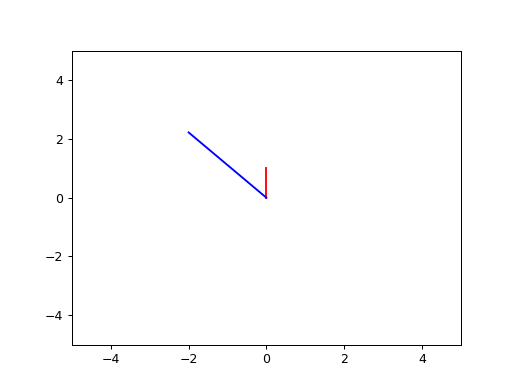

In [751]:
pl.figure()
pl.plot([0, v[0]], [0, v[1]], 'r')
pl.plot([0, v_p[0]], [0, v_p[1]], 'b')
pl.ylim([-5, 5])
pl.xlim([-5, 5])
pl.subplots_adjust(bottom=0.2, right=0.8)

In [720]:
proj_ctx_x = np.array([p[0] for p in transf_vs])
proj_ctx_y = np.array([p[1] for p in transf_vs])

# origx = np.reshape(df['x'].values, (d1, d2))
# origy = np.reshape(df['y'].values, (d1, d2))

newx = np.reshape(proj_ctx_x, (d1, d2))
newy = np.reshape(proj_ctx_y, (d1, d2))

<IPython.core.display.Javascript object>


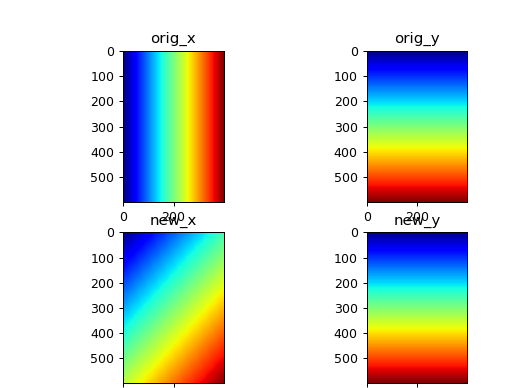

Text(0.5, 1.0, 'new_y')

In [721]:
fig, axn = pl.subplots(2,2)
ax=axn[0,0]
ax.imshow(origx, cmap='jet') #, vmin=newx.min(), vmax=newx.max())
ax.set_title('orig_x')
ax=axn[0,1]
ax.imshow(origy, cmap='jet') #, vmin=newx.min(), vmax=newx.max())
ax.set_title('orig_y')

ax=axn[1,0]
ax.imshow(newx, cmap='jet') #, vmin=newx.min(), vmax=newx.max())
ax.set_title('new_x')

ax=axn[1,1]
ax.imshow(newy, cmap='jet') #, vmin=newx.min(), vmax=newx.max())
ax.set_title('new_y')


In [685]:
np.linalg.inv(B_2).dot((1,0))

array([0.97535934, 0.08213552])

In [686]:
np.linalg.inv(B_2) @ ((1,0))

array([0.97535934, 0.08213552])

In [156]:
# Align CTX to GRADIENT (RFS)
gvectors_TILES = {'az': grad_az['vhat'], 'el': grad_el['vhat']}
projdf = grd.align_cortex_to_gradient(soma_rfs, gvectors_TILES, 
                                  xlabel='ml_pos', ylabel='ap_pos')
df_tiles = pd.concat([soma_rfs, projdf], axis=1)

In [174]:
# def regress_cortex_and_retino_pos(df_tiles, model='ridge'):
#     '''
#     Linear regression for each condition (az, el). 
#     Return as dataframe.
#     '''
#     r_=[]
#     for ai, cond in enumerate(['az', 'el']):
#         ctx_label = 'ml' if cond=='az' else 'ap'
#         ret_label = 'x0' if cond=='az' else 'y0'

#         xvs = df_tiles['%s_proj' % ctx_label].values
#         yvs = df_tiles['%s' % ret_label].values
#         regr_, linmodel = rfutils.do_linear_fit(xvs, yvs, model=model)
#         regr_['cond'] = cond
#         r_.append(regr_)
#     regr_tiles = pd.concat(r_)
#     return regr_tiles
importlib.reload(grd)

<module 'analyze2p.gradients' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/gradients.py'>

In [175]:
regr_tiles = grd.regress_cortex_and_retino_pos(df_tiles, model='ridge')
regr_tiles

~~~regr results: y = 0.02 + 13.86 (R2=0.65)
~~~regr results: y = 0.01 + -10.44 (R2=0.46)


,R2,RMSE,pearson_p,pearson_r,coefficient,intercept,cond
0,0.647606,3.823334,2.081717e-21,0.804739,0.022941,13.858314,az
1,0.459531,3.091196,2.949442e-13,0.677887,0.011196,-10.444855,el


<IPython.core.display.Javascript object>


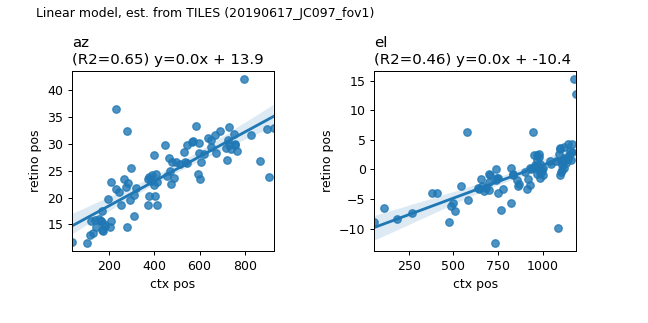

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [177]:
# Calculate LINEAR REGR from RFs
%matplotlib notebook

fig = grd.plot_cortex_and_retino_pos(df_tiles, regr_tiles)
fig.text(0.05, 0.95, 'Linear model, est. from TILES (%s)' % dk)
pl.savefig(os.path.join(basedir, 'linmodel_ctx_v_retino.svg'))

In [204]:
# Predict RETINO from CTX position -- TILES
for ai, cond in enumerate(['az', 'el']):
    ctx_label = 'ml' if cond=='az' else 'ap'
    ret_label = 'x0' if cond=='az' else 'y0'
    p_x = predict_retino_position(regr_tiles, cond=cond, 
                              points=df_tiles['%s_proj' % ctx_label].values)
    df_tiles['predicted_%s' % ret_label] = p_x

##### ... and, compare to MOVINGBAR

#### Load MODEL - retino

In [173]:
# retinodf['ap_proj'] = ''
retinorun='retino'
session, animalid, fovnum = hutils.split_datakey_str(dk)

In [174]:
sdata[(sdata.visual_area==va) & (sdata.datakey==dk)
     & (sdata.experiment=='retino')]

,experiment,visual_area,datakey,fov,animalid,session,fovnum
218,retino,V1,20191006_JC110_fov1,FOV1_zoom2p0x,JC110,20191006,1


In [175]:
print(dk)

retinorun='retino_run'

20191006_JC110_fov1


In [176]:
proj_results = 'vectors'
fpaths = [f for f in glob.glob(os.path.join(rootdir, animalid, 
            session, 'FOV%i_*' % fovnum, 'retino*',#% retinorun, 
            'retino_analysis/retino_structure', 
            '%s_*.pkl' % (proj_results))) if '_pixels_thr' not in f] 
for fp in fpaths:
    print(fp)

fpath = fpaths[-1]
with open(fpath, 'rb') as f:
    gvectors_BAR = pkl.load(f, encoding='latin1')
gvectors_BAR.keys()

/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/retino_run1/retino_analysis/retino_structure/vectors_V1.pkl


dict_keys(['el', 'az'])

In [177]:
retinorun = os.path.split(fpath.split('/retino_analysis')[0])[-1]
retinorun

'retino_run1'

In [178]:
# Load LIN MODEL - moving bar
proj_results = 'projections'
fpaths = [f for f in glob.glob(os.path.join(rootdir, animalid, 
            session, 'FOV%i_*' % fovnum, '%s*' % retinorun, 
            'retino_analysis/retino_structure', 
            '%s_*.pkl' % (proj_results))) if '_pixels_thr' not in f] 
for fp in fpaths:
    print(fp)
fpath = fpaths[-1]
with open(fpath, 'rb') as f:
    presults = pkl.load(f, encoding='latin1')
regr_bar = presults['regr_df'].copy()
print(regr_bar.to_markdown())

/n/coxfs01/2p-data/JC110/20191006/FOV1_zoom2p0x/retino_run1/retino_analysis/retino_structure/projections_V1.pkl
|    |       R2 |    RMSE |   coefficient | cond   |   intercept |   pearson_p |   pearson_r |
|---:|---------:|--------:|--------------:|:-------|------------:|------------:|------------:|
|  0 | 0.886529 | 1.78109 |    0.0178011  | az     |     19.8711 |           0 |    0.941557 |
|  1 | 0.810955 | 1.46739 |    0.00932511 | el     |    -10.7693 |           0 |    0.90053  |


In [179]:
regr_bar

,R2,RMSE,coefficient,cond,intercept,pearson_p,pearson_r
0,0.886529,1.781086,0.017801,az,19.871119,0.0,0.941557
1,0.810955,1.467389,0.009325,el,-10.769289,0.0,0.900530


In [180]:
# Align CTX to GRADIENT -- use MOVINGBAR
projdf = align_cortex_to_gradient(rfdf, gvectors_BAR, 
                                  xlabel='ml_pos', ylabel='ap_pos')
df_tiles_to_bar = pd.concat([rfdf, projdf], axis=1)

for ai, cond in enumerate(['az', 'el']):
    ctx_label = 'ml' if cond=='az' else 'ap'
    ret_label = 'x0' if cond=='az' else 'y0'
    p_x = predict_retino_position(regr_bar, cond=cond, 
                              points=df_tiles_to_bar['%s_proj' % ctx_label].values)
    df_tiles_to_bar['predicted_%s' % ret_label] = p_x
    
df_tiles_to_bar['residuals_x0'] = df_tiles_to_bar['x0']-df_tiles_to_bar['predicted_x0']
df_tiles_to_bar['residuals_y0'] = df_tiles_to_bar['y0']-df_tiles_to_bar['predicted_y0']

[1.00000012e+00 1.19209290e-07] [1.19209290e-07 1.00000012e+00]


<IPython.core.display.Javascript object>


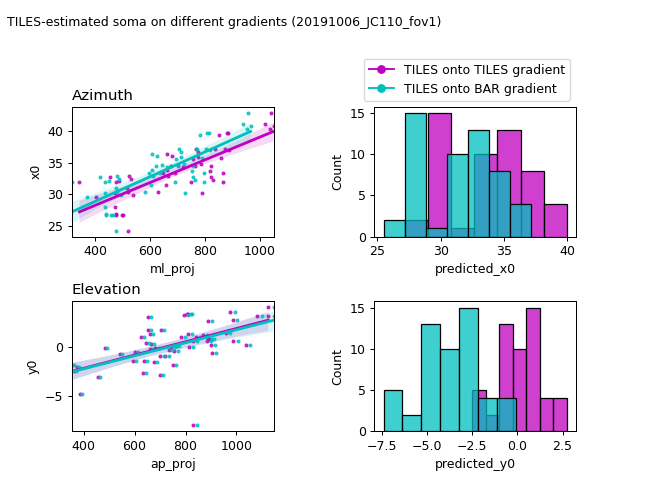

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

In [181]:
c1='m'
c2='c'
fig, axn = pl.subplots(2,2, figsize=(8,6))
ax=axn[0,0]
ax.set_title('Azimuth', loc='left')
sns.regplot('ml_proj', 'x0', data=df_tiles, ax=ax, scatter_kws={'s':5},
            color=c1)
sns.regplot('ml_proj', 'x0', data=df_tiles_to_bar, ax=ax, scatter_kws={'s':5},
            color=c2)
ax=axn[0,1]
sns.histplot(df_tiles['predicted_x0'], ax=ax, color=c1)
sns.histplot(df_tiles_to_bar['predicted_x0'], ax=ax, color=c2)

ax=axn[1,0]
ax.set_title('Elevation', loc='left')
sns.regplot('ap_proj', 'y0', data=df_tiles, ax=ax, scatter_kws={'s':5}, 
            color=c1)
sns.regplot('ap_proj', 'y0', data=df_tiles_to_bar, ax=ax, scatter_kws={'s':5}, 
            color=c2)
ax=axn[1,1]
sns.histplot(df_tiles['predicted_y0'], ax=ax, color=c1)
sns.histplot(df_tiles_to_bar['predicted_y0'], ax=ax, color=c2)
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.2, top=0.8, wspace=0.5, hspace=0.5)

leg_h = pplot.custom_legend_markers(colors=[c1, c2],
                                    labels=['TILES onto TILES gradient',
                                           'TILES onto BAR gradient'])
axn[0, 1].legend(handles=leg_h, bbox_to_anchor=(1,1), loc='lower right')

fig.text(0.01, 0.95, 'TILES-estimated soma on different gradients (%s)' % dk)

figname = 'tiles_soma_on_tile_vs_bar__%s' % dk
pl.savefig(os.path.join(basedir, '%s.svg'))

In [182]:
importlib.reload(retutils)

<module 'analyze2p.retinotopy.utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/retinotopy/utils.py'>

In [921]:
def load_movingbar_results(dk, retinorun):
    # load retinodata
    retinoid, RETID = retutils.load_retino_analysis_info(
                        dk, run=retinorun, use_pixels=False)
    data_id = '_'.join([dk, retinorun, retinoid])
    print("DATA ID: %s" % data_id)
    scaninfo = retutils.get_protocol_info(dk, run=retinorun)

    # Image dimensions
    d2_orig = scaninfo['pixels_per_line']
    d1_orig = scaninfo['lines_per_frame']
    print("Original dims: [%i, %i]" % (d1_orig, d2_orig))
    ds_factor = int(RETID['PARAMS']['downsample_factor'])
    print('Data were downsampled by %i.' % ds_factor)
    # Get pixel size
    pixel_size = hutils.get_pixel_size()
    pixel_size_ds = (pixel_size[0]*ds_factor, pixel_size[1]*ds_factor)
    d1 = int(d1_orig/ds_factor)
    d2 = int(d2_orig/ds_factor)
    print(d1, d2)

    # Load fft 
    fft_results = retutils.load_fft_results(dk,
                                    retinorun=retinorun, traceid=traceid, 
                                    rootdir=rootdir, create_new=False,
                                    use_pixels=False)
    fft_soma = fft_results['fft_soma']
    fft_np = fft_results['fft_neuropil']
    # Create dataframe of magratios -- each column is a condition
    magratios_soma, phases_soma = retutils.extract_from_fft_results(fft_soma)
    magratios_np, phases_np = retutils.extract_from_fft_results(fft_np)
    dims = (d1_orig, d2_orig)
    
    return magratios_soma, phases_soma, magratios_np, phases_np, dims

In [923]:
datakey='20190617_JC097_fov1'
retinorun='retino_run1'

In [924]:
mags_soma, phases_soma, mags_np, phases_np, dims = load_movingbar_results(dk, 
                                                                          retinorun)


DATA ID: 20190617_JC097_fov1_retino_run1_analysis002
Original dims: [512, 512]
Data were downsampled by 2.
256 256


In [925]:
magthr_2p=0.001
delay_map_thr=1.0
ds_factor=2
# #### Get maps
# abs_vmin, abs_vmax = (-np.pi, np.pi)
mvb_soma = retutils.get_final_maps(mags_soma, phases_soma, 
                    trials_by_cond=None,
                    mag_thr=magthr_2p, dims=dims,
                    ds_factor=ds_factor, use_pixels=False)

In [926]:
# Add position info
mvb_soma['datakey'] = dk
mvb_soma['visual_area'] = va
mvb_soma['experiment'] = experiment
mvb_soma['cell'] = mvb_soma.index.tolist()
ret_ = aggr.add_roi_positions(mvb_soma)

Adding ROI position info...


In [927]:
ret_.head()

,phase_az,phase_el,mag_az,mag_el,datakey,visual_area,experiment,cell,animalid,fov,session,fov_xpos,fov_xpos_pix,fov_ypos,fov_ypos_pix,ml_pos,ap_pos
0,1.693642,0.071632,0.042339,0.040436,20190617_JC097_fov1,V1,rfs,0,JC097,FOV1_zoom2p0x,20190617,165.924070,72,24.748337,13,948.051663,1011.675930
1,1.666080,0.166492,0.034996,0.033991,20190617_JC097_fov1,V1,rfs,1,JC097,FOV1_zoom2p0x,20190617,156.706067,68,36.170646,19,936.629354,1020.893933
2,NaN,NaN,0.012391,0.012496,20190617_JC097_fov1,V1,rfs,2,JC097,FOV1_zoom2p0x,20190617,163.619569,71,78.052446,41,894.747554,1013.980431
3,1.183198,0.311346,0.015800,0.008688,20190617_JC097_fov1,V1,rfs,3,JC097,FOV1_zoom2p0x,20190617,179.751076,78,102.800783,54,869.999217,997.848924
4,1.681206,0.207860,0.015087,0.012896,20190617_JC097_fov1,V1,rfs,4,JC097,FOV1_zoom2p0x,20190617,168.228571,73,49.496673,26,923.303327,1009.371429


In [928]:
# ret_ = pd.concat([centroids, mvb_soma], axis=1)

In [929]:
magthr_2p=0.02
pass_mag_rois = ret_[(ret_.mag_az>magthr_2p) 
                      & (ret_.mag_el>magthr_2p)].index.tolist()
retinodf = ret_.loc[pass_mag_rois]

In [191]:
screen2p_x = 119.5564
screen2p_y = 67.323
resolution2p = [1920, 1080] #[1024, 768]
abs_vmin, abs_vmax = (-np.pi, np.pi)

lmax_az_2p = screen2p_x #/2.
lmin_az_2p = 0 #-screen2p_x #-lmax_az_2p
lmax_el_2p = screen2p_y #/2.
lmin_el_2p = 0 #-screen2p_y# 0 #-lmax_el_2p

retinodf['az_lin'] = hutils.convert_range(retinodf['phase_az'], newmin=lmin_az_2p, newmax=lmax_az_2p, 
                                   oldmin=abs_vmin, oldmax=abs_vmax)
retinodf['el_lin'] = hutils.convert_range(retinodf['phase_el'], newmin=lmin_az_2p, newmax=lmax_az_2p, 
                                   oldmin=abs_vmin, oldmax=abs_vmax)

retinodf['x0'] = retinodf['az_lin'] - (lmax_az_2p/2.)
retinodf['y0'] = retinodf['el_lin'] - (lmax_az_2p/2.)

In [192]:
retinodf.head()

,phase_az,phase_el,mag_az,mag_el,datakey,visual_area,experiment,cell,animalid,fov,...,fov_xpos,fov_xpos_pix,fov_ypos,fov_ypos_pix,ml_pos,ap_pos,az_lin,el_lin,x0,y0
0,1.755200,-0.063843,0.032374,0.027805,20191006_JC110_fov1,V1,rfs,0,JC110,FOV1_zoom2p0x,...,318.021135,138,11.422309,6,961.377691,859.578865,93.176122,58.563391,33.397922,-1.214809
4,1.748735,-0.156081,0.043288,0.033929,20191006_JC110_fov1,V1,rfs,4,JC110,FOV1_zoom2p0x,...,251.190607,109,51.400391,27,921.399609,926.409393,93.053114,56.808283,33.274914,-2.969917
18,1.920005,0.141740,0.029623,0.021055,20191006_JC110_fov1,V1,rfs,18,JC110,FOV1_zoom2p0x,...,147.488063,64,112.319374,59,860.480626,1030.111937,96.312038,62.475231,36.533838,2.697031
19,1.770000,0.061891,0.020579,0.021825,20191006_JC110_fov1,V1,rfs,19,JC110,FOV1_zoom2p0x,...,165.924070,72,112.319374,59,860.480626,1011.675930,93.457747,60.955861,33.679547,1.177661
22,1.832216,-0.015184,0.025589,0.025187,20191006_JC110_fov1,V1,rfs,22,JC110,FOV1_zoom2p0x,...,103.702544,45,123.741683,65,849.058317,1073.897456,94.641587,59.489286,34.863387,-0.288914


In [193]:
# Align CTX to GRADIENT (RFS)
retino_proj = align_cortex_to_gradient(retinodf, gvectors_BAR, 
                                  xlabel='ml_pos', ylabel='ap_pos')
df_bar = pd.concat([retinodf, retino_proj], axis=1)

[1.00000012e+00 1.19209290e-07] [1.19209290e-07 1.00000012e+00]


In [194]:
# Predict retino position from cortical position
for ai, cond in enumerate(['az', 'el']):
    ctx_label = 'ml' if cond=='az' else 'ap'
    ret_label = 'x0' if cond=='az' else 'y0'
    p_x = predict_retino_position(regr_bar, cond=cond, 
                              points=df_bar['%s_proj' % ctx_label].values)
    df_bar['predicted_%s' % ret_label] = p_x


In [195]:
df_tiles['residuals_x0'] = df_tiles['x0'] - df_tiles['predicted_x0']
df_tiles['residuals_y0'] = df_tiles['y0'] - df_tiles['predicted_y0']

df_bar['residuals_x0'] = df_bar['x0'] - df_bar['predicted_x0']
df_bar['residuals_y0'] = df_bar['y0'] - df_bar['predicted_y0']


<IPython.core.display.Javascript object>


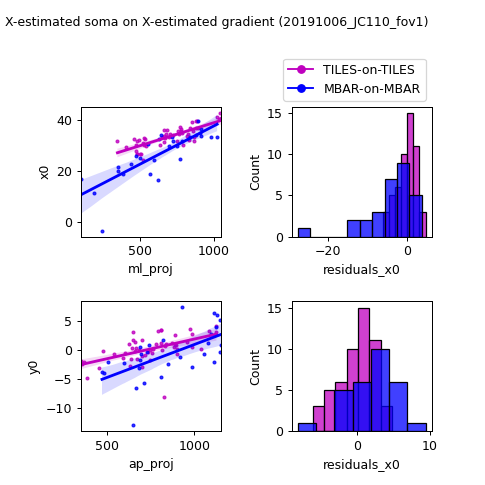

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

In [196]:
c1='m'
c2='b'
labels = ['TILES-on-TILES', 'MBAR-on-MBAR']
fig, axn = pl.subplots(2,2, figsize=(6,6))
ax=axn[0, 0]
sns.regplot('ml_proj', 'x0', data=df_tiles, ax=ax, color=c1,
           scatter_kws={'s':5})
ax=axn[0, 0]
sns.regplot('ml_proj', 'x0', data=df_bar, ax=ax, color=c2,
           scatter_kws={'s':5})
ax=axn[0,1]
sns.histplot(df_tiles['residuals_x0'], ax=ax, label='x0', color=c1)
sns.histplot(df_bar['residuals_x0'], ax=ax, label='y0', color=c2)

ax=axn[1, 0]
sns.regplot('ap_proj', 'y0', data=df_tiles, ax=ax, color=c1,
           scatter_kws={'s':5})
ax=axn[1, 0]
sns.regplot('ap_proj', 'y0', data=df_bar, ax=ax, color=c2,
           scatter_kws={'s':5})
ax=axn[1,1]
sns.histplot(df_tiles['residuals_x0'], ax=ax, label='x0', color=c1)
sns.histplot(df_bar['residuals_y0'], ax=ax, label='y0', color=c2)

pl.subplots_adjust(left=0.15, right=0.8, bottom=0.2, top=0.8, wspace=0.5, hspace=0.5)

leg_h = pplot.custom_legend_markers(colors=[c1, c2],
                                    labels=labels)
axn[0, 1].legend(handles=leg_h, bbox_to_anchor=(1,1), loc='lower right')

fig.text(0.01, 0.95, 'X-estimated soma on X-estimated gradient (%s)' % dk)

figname = 'like_with_like__%s' % dk
pl.savefig(os.path.join(basedir, '%s.svg' % figname))
